In [7]:
import os
import pandas as pd
import fitz
from PyPDF2 import PdfReader 
import pytesseract
from pdf2image import convert_from_path
import pdfplumber
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from wordcloud import WordCloud

In [9]:
for dirname, _, filename in os.walk('/Users/rivva/Build/jobie/resumeparser/input/data/data'):
    for file in filename:
        if file.endswith('.pdf'):
            print(os.path.join(dirname, file))
            

/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/37201447.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/12674256.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/29968330.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/81042872.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/20006992.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/15603319.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/17499196.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/23631188.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/16653657.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/16172429.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/20969119.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/data/AGRICULTURE/16507693.pdf
/Users/rivva/Build/jobie/resumeparser/input/data/dat

In [33]:
def extractTextPyPDF2(pdfpath):
    text = ""
    try:
        reader = PdfReader(pdfpath)
        for page in reader.pages:
            pagetext = page.extract_text() 
            if pagetext:
                text += pagetext + "\n"
    except Exception as e:
        print(f"Error reading {pdfpath}: {e}")
    return text


In [34]:
def isGoodText(text):
    if not text or len(text.strip()) == 0:
        return False
    word_pattern = re.compile(r'\b\w+\b')
    words = re.findall(word_pattern, text)
    if len(words) >= 3:
        return True
    return False

In [35]:
def extractResumeHTML(category, filename):
    html_content = " "
    try:
        html_path = os.path.join('/Users/rivva/Build/jobie/resumeparser/input/data/data', category, filename.replace('.pdf', '.html'))
        if os.path.exists(html_path):
            with open(html_path, 'r', encoding='utf-8') as file:
                html_content = file.read()
    except Exception as e:
        print(f"Error reading {html_path}: {e}")
    return html_content


In [36]:
resumeData = []
dataDir = "/Users/rivva/Build/jobie/resumeparser/input/data/data"
categories = os.listdir(dataDir)
totalResumes = 0
for category in categories:
    categoryPath = os.path.join(dataDir, category)
    if os.path.isdir(categoryPath):
        
        totalResumes += len([f for f in os.listdir(categoryPath) if f.endswith('.pdf')])
print(f"Total resumes found: {totalResumes}")
                

Total resumes found: 2484


In [37]:
def extractBestText(pdfpath):
    textPypdf2 = extractTextPyPDF2(pdfpath)
    isPyPDF2Good = isGoodText(textPypdf2)
    if isPyPDF2Good:
        return textPypdf2
    else:
        return 0

In [52]:
processedResumes = 0
resumeData = []
total_resumes = sum(len(files) for r, d, files in os.walk(dataDir) if files)
for category in categories:
    categoryPath = os.path.join(dataDir, category)
    if os.path.isdir(categoryPath):
        for filename in os.listdir(categoryPath):
            if filename.endswith('.pdf'):
                pdfPath = os.path.join(categoryPath, filename)

                resumetext = extractBestText(pdfPath)
                resumeid = filename.replace('.pdf', '')
                resumeData.append({
                    'resumeid': resumeid,
                    'category': category,
                    
                    'resume_str': resumetext,
                    
                })
                processedResumes += 1
                progress = (processedResumes / totalResumes) * 100
                print(f"\nProcessing {filename} in category ' {category} ' ... ({processedResumes}/{total_resumes} - {progress:.2f}%)")
                


Processing 37201447.pdf in category ' AGRICULTURE ' ... (1/2484 - 0.04%)

Processing 12674256.pdf in category ' AGRICULTURE ' ... (2/2484 - 0.08%)

Processing 29968330.pdf in category ' AGRICULTURE ' ... (3/2484 - 0.12%)

Processing 81042872.pdf in category ' AGRICULTURE ' ... (4/2484 - 0.16%)

Processing 20006992.pdf in category ' AGRICULTURE ' ... (5/2484 - 0.20%)

Processing 15603319.pdf in category ' AGRICULTURE ' ... (6/2484 - 0.24%)

Processing 17499196.pdf in category ' AGRICULTURE ' ... (7/2484 - 0.28%)

Processing 23631188.pdf in category ' AGRICULTURE ' ... (8/2484 - 0.32%)

Processing 16653657.pdf in category ' AGRICULTURE ' ... (9/2484 - 0.36%)

Processing 16172429.pdf in category ' AGRICULTURE ' ... (10/2484 - 0.40%)

Processing 20969119.pdf in category ' AGRICULTURE ' ... (11/2484 - 0.44%)

Processing 16507693.pdf in category ' AGRICULTURE ' ... (12/2484 - 0.48%)

Processing 28165687.pdf in category ' AGRICULTURE ' ... (13/2484 - 0.52%)

Processing 36102323.pdf in catego

In [39]:
resumeDatadf = pd.DataFrame(resumeData)
resumeDatadf.to_excel('output.xlsx', index=False, engine='openpyxl')

In [40]:
ResumeDatadf = pd.read_excel('output.xlsx', engine='openpyxl')
ResumeDatadf.head(11)

,resumeid,category,resumetext
0,37201447,AGRICULTURE,ADULT EDUCATION INSTRUCTOR\nSummary\nSeasoned ...
1,12674256,AGRICULTURE,FINANCIAL SALES CONSULTANT\nProfessional Summa...
2,29968330,AGRICULTURE,EXTENSION METHODOLOGIST\nProfile\nSelf-motivat...
3,81042872,AGRICULTURE,RESEARCH SCIENTIST\nSummary\nHighly motivated ...
4,20006992,AGRICULTURE,"FRONT DESK CLERK (FEE BASIS, JOHN D DINGELL VA..."
5,15603319,AGRICULTURE,GRADUATE RESEARCH ASSISTANT\nProfessional Summ...
6,17499196,AGRICULTURE,JAMAICA- APICULTURE EXTENSION SPECIALIST\nSumm...
7,23631188,AGRICULTURE,ACCOUNTS PAYABLE AP - (CREDITORS) SUPERVISOR\n...
8,16653657,AGRICULTURE,QUALITY ASSURANCE ASSOCIATE\nSummary\nEnthusia...
9,16172429,AGRICULTURE,FINANCIAL INSTITUTION EXAMINER\nSummary\nCommi...


In [41]:
print('The resume Datase contains{:,d} rows & {} columns'.format(ResumeDatadf.shape[0], ResumeDatadf.shape[1]))

The resume Datase contains2,484 rows & 3 columns


In [42]:
ResumeDatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   resumeid    2484 non-null   int64 
 1   category    2484 non-null   object
 2   resumetext  2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


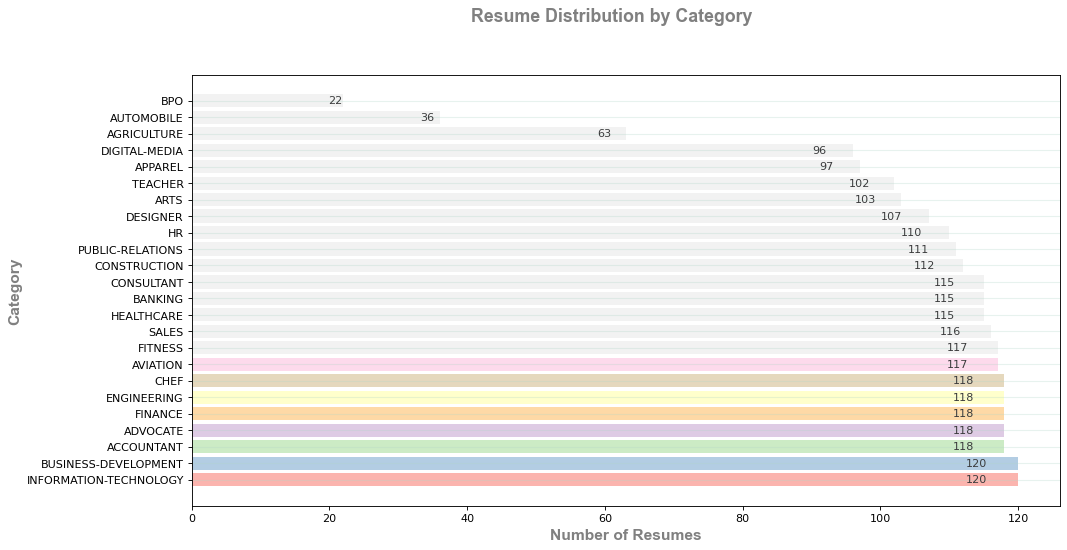

In [47]:
category_count = ResumeDatadf['category'].value_counts()
plt.figure(figsize=(14, 7), dpi = 80)
bars = plt.barh(category_count.index, category_count.values, color = plt.cm.Pastel1(range(len(category_count))))
for bar in bars:
    plt.text(bar.get_width() - bar.get_width() * 0.05, bar.get_y() + bar.get_height() / 2,
        str(int(bar.get_width())),
        ha = 'center', va = 'center', fontsize=10,  fontweight='light', color = "#3A3B3C"
    )
plt.suptitle('Resume Distribution by Category', fontsize=16, fontweight='bold', color='grey', font= 'Arial', y = 1)
plt.xlabel('Number of Resumes', fontsize=14, fontweight='bold', color='grey', font= 'Arial')
plt.ylabel('Category', fontsize=14, fontweight='bold', color='grey', font = 'Arial')
plt.grid(color = '#b2d6c7', linewidth = 1, axis = 'y', alpha = .3)

In [55]:
print(ResumeDatadf.columns)

Index(['resumeid', 'category', 'resumetext'], dtype='object')


In [58]:
all_resumes_text = " ".join(ResumeDatadf['resumetext'].dropna().astype(str))


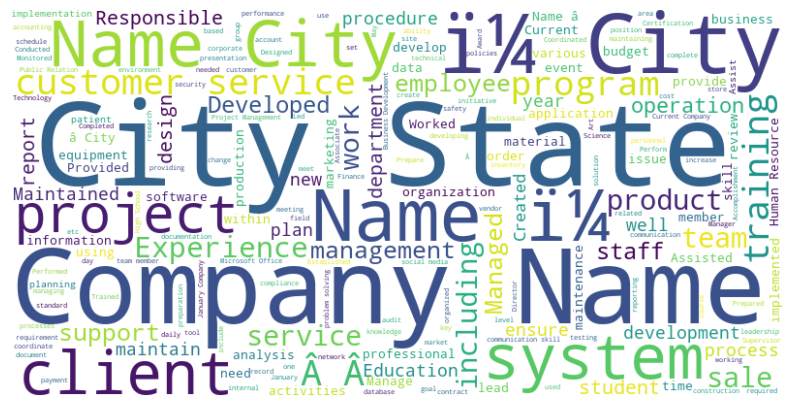

In [59]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_resumes_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Consine similarity, consine of the angle between two vectors projected in multi-dim space, small the angle, big the similarity

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
def clean_text(text):
    if text is None:
        return ""
    return str(text)
def get_resume_score(resumetext, jobdescriptiontext):
    resumetext = clean_text(resumetext)
    jobdescriptiontext = clean_text(jobdescriptiontext)
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform([resumetext, jobdescriptiontext])
    print("\n Similarity Scores:")
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent


In [64]:
jobdescriptiontext = """What you'll do:
The role involves partnering very closely with multiple PMs, Engineers, Test
Managers and Business Partner to elevate the site experience for the
verticals on Walmart. Analyze click stream data to understand how
customers are interacting with the site. Uncover user pain points and help in
building inspirational experiences.
Provide and supports the implementation of product solutions
Provide data driven insights and deliver recommendations that address opportunities for product improvements
Provide analytical support to Product Managers
Ensure accuracy of data capture strategy
A/B Test: Test variations on messaging or features.
Display dashboards: Visualize data with templated or custom
reports. Create effective reporting and dashboards.
Measure: Measure engagement by feature
A self-starter: Can drive projects with minimal guidance
Strong communicator: You effectively synthesize, visualize, and
communicate your ideas to others


You’ll sweep us off our feet if…
You’re able to use metrics to improve performance
You’re excited about solving complex challenges
You’re customer-centric in spirit and in execution
You’re comfortable influencing others, leading teams, managing stakeholders, and communicating clearly
You have a test and learn mentality and an agile way of working to improve your product"""

In [70]:
for resume in resumeData:
    resumetext = resume['resume_str']
    ats_score = get_resume_score(resumetext, jobdescriptiontext)
    resume['ats_score'] = ats_score
    print(f"Resume ID: {resume['resumeid']}, ATS Score: {ats_score}")


 Similarity Scores:
Resume ID: 37201447, ATS Score: 3.23

 Similarity Scores:
Resume ID: 12674256, ATS Score: 4.49

 Similarity Scores:
Resume ID: 29968330, ATS Score: 7.62

 Similarity Scores:
Resume ID: 81042872, ATS Score: 5.14

 Similarity Scores:
Resume ID: 20006992, ATS Score: 5.56

 Similarity Scores:
Resume ID: 15603319, ATS Score: 8.27

 Similarity Scores:
Resume ID: 17499196, ATS Score: 6.67

 Similarity Scores:
Resume ID: 23631188, ATS Score: 5.71

 Similarity Scores:
Resume ID: 16653657, ATS Score: 14.51

 Similarity Scores:
Resume ID: 16172429, ATS Score: 5.25

 Similarity Scores:
Resume ID: 20969119, ATS Score: 12.11

 Similarity Scores:
Resume ID: 16507693, ATS Score: 9.71

 Similarity Scores:
Resume ID: 28165687, ATS Score: 5.94

 Similarity Scores:
Resume ID: 36102323, ATS Score: 15.41

 Similarity Scores:
Resume ID: 21868149, ATS Score: 8.83

 Similarity Scores:
Resume ID: 11197262, ATS Score: 8.42

 Similarity Scores:
Resume ID: 11813872, ATS Score: 26.66

 Similari